In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
plt.style.use("ggplot") 

from utils import get_data_and_label_encoder, train_and_evaluate_deepfm_model, check_and_use_gpus

os.chdir('../')

2022-01-14 22:23:05.125337: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [2]:
sparse_features = ["shop_tag", "masts", "poscd", "educd", "trdtp", "naty", "slam", "gender_code", "age", "txn_cnt"]
dense_features = ["dt"]
target_name = ["txn_amt"]
data, label_encoder = get_data_and_label_encoder(sparse_features + dense_features + target_name + ["chid"])

/home/cae-lab/.local/share/virtualenvs/Esun_AI_True-fRyowkva/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/home/cae-lab/Homework/Esun AI True/src/utils/get_data_and_label_encoder.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["shop_tag"] = data["shop_tag"].replace("other", 49)
/home/cae-lab/Homework/Esun AI True/src/utils/get_data_and_label_encoder.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

/home/cae-lab/.local/share/virtualenvs/Esun_AI_True-fRyowkva/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/home/cae-lab/.local/share/virtualenvs/Esun_AI_True-fRyowkva/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are 

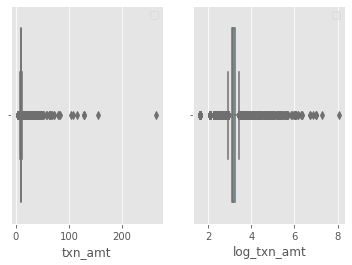

In [3]:
data["log_txn_amt"] = np.log2(data["txn_amt"])

plt.subplot(1, 2, 1)
sns.boxplot(data["txn_amt"], orient="h", color="skyblue")
plt.xlabel("txn_amt")
plt.legend()

plt.subplot(1, 2, 2)
sns.boxplot(data["log_txn_amt"], orient="h", color="skyblue")
plt.xlabel("log_txn_amt")
plt.legend()
plt.show()

In [4]:
data.head()

,shop_tag,masts,poscd,educd,trdtp,naty,slam,gender_code,age,txn_cnt,dt,txn_amt,chid,log_txn_amt
0,39,1.0,99.0,4.0,5.0,1.0,95982.822967,1.0,4.0,3,1,8.266670,10321418,3.047306
1,6,2.0,2.0,2.0,15.0,1.0,130702.351368,1.0,3.0,2,1,9.270170,10414574,3.212596
2,42,1.0,3.0,3.0,11.0,1.0,112010.611717,0.0,4.0,2,1,10.065932,10134567,3.331409
3,42,2.0,2.0,3.0,11.0,1.0,59701.507360,0.0,3.0,9,1,9.784229,10001003,3.290458
5,3,2.0,1.0,4.0,2.0,1.0,95982.822967,0.0,5.0,1,1,7.782091,10256467,2.960158


In [5]:
shop_tag = np.sort(data["shop_tag"].unique())
txn_amt_with_tag_mean = []
txn_amt_with_tag_sum = []
for tag in shop_tag:
    txn_amt_with_tag_mean.append(data[data["shop_tag"] == tag]["txn_cnt"].mean())
    txn_amt_with_tag_sum.append(data[data["shop_tag"] == tag]["txn_cnt"].sum())

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


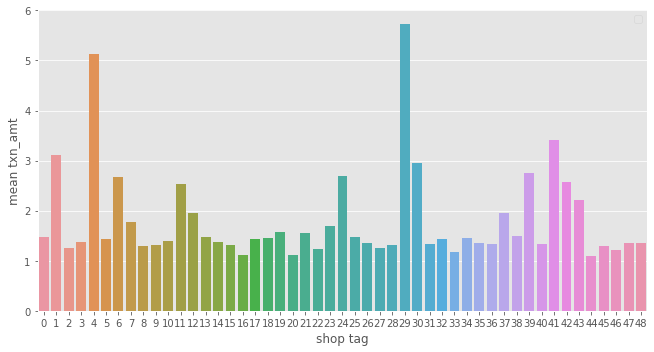

In [13]:
plot_dataframe = pd.DataFrame({
    "x": shop_tag,
    "y": txn_amt_with_tag_mean
})

plot = sns.catplot(data=plot_dataframe, kind="bar", x="x", y="y")
plot.fig.set_figwidth(10)
plt.xlabel("shop tag")
plt.ylabel("mean txn_amt")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


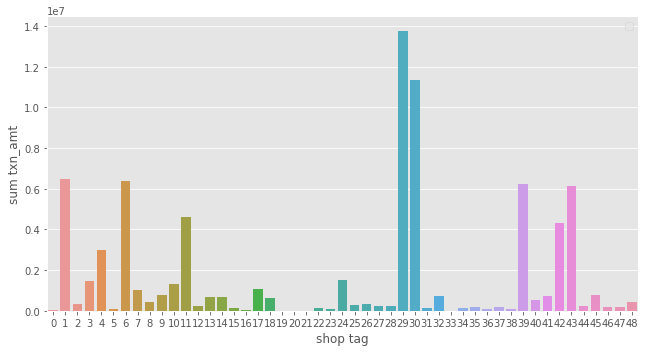

In [15]:
plot_dataframe = pd.DataFrame({
    "x": shop_tag,
    "y": txn_amt_with_tag_sum
})

plot = sns.catplot(data=plot_dataframe, kind="bar", x="x", y="y")
plot.fig.set_figwidth(10)
plt.xlabel("shop tag")
plt.ylabel("sum txn_amt")
plt.legend()
plt.show()

In [16]:
gender_code = np.sort(data["gender_code"].unique())
txn_amt_with_gender_mean = []
txn_amt_with_gender_sum = []
for gender in gender_code:
    txn_amt_with_tag_mean.append(data[data["gender_code"] == gender]["txn_cnt"].mean())
    txn_amt_with_tag_sum.append(data[data["gender_code"] == gender]["txn_cnt"].sum())